In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('globalcount_data.csv')

In [3]:
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,...,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,...,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,...,SINGA,SINGA,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00


In [59]:
df.drop(['surveydate', 'row_id', 'unique_id'], axis = 1, inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 89 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   survey_type                                              24051 non-null  object 
 1   iso3166                                                  24046 non-null  object 
 2   city_town                                                24049 non-null  object 
 3   city_town_tr                                             20503 non-null  object 
 4   country_of_residence                                     24050 non-null  object 
 5   gender_not_listed                                        24051 non-null  int64  
 6   cisgender_man                                            24051 non-null  int64  
 7   cisgender_woman                                          24051 non-null  int64  
 8   non_conforming_or_non_bina

In [69]:
df['country_of_residence'].value_counts().sort_values(ascending = False)

Switzerland           2335
Belarus               2151
Russian Federation    1913
Ukraine               1338
Kazakhstan            1320
                      ... 
Cabo Verde               1
Guyana                   1
Cayman Islands           1
Cyprus                   1
Bhutan                   1
Name: country_of_residence, Length: 155, dtype: int64

<AxesSubplot:>

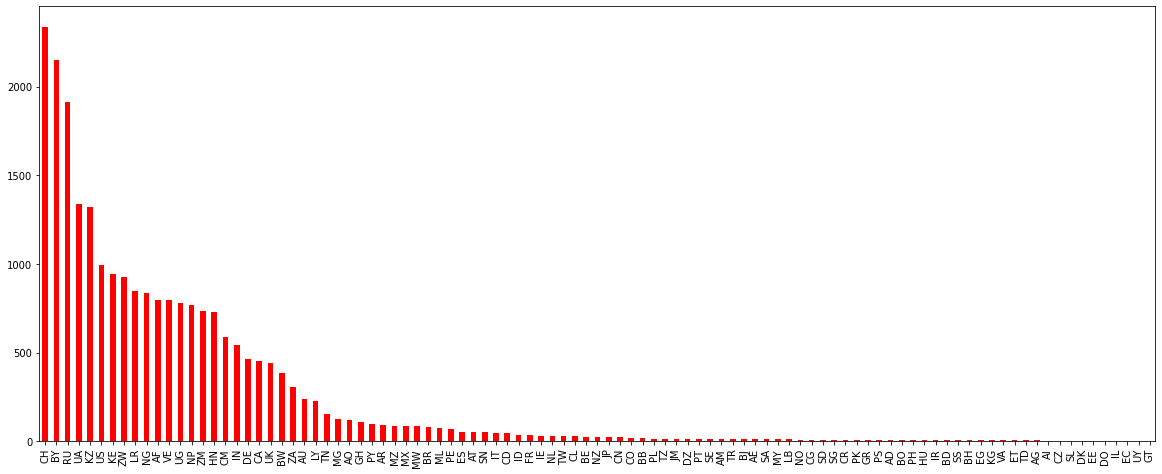

In [13]:
# ch is switzerland
df['iso3166'].value_counts().sort_values(ascending = False)[:99].plot(kind = 'bar', figsize = (20,8), color = 'red')

<AxesSubplot:>

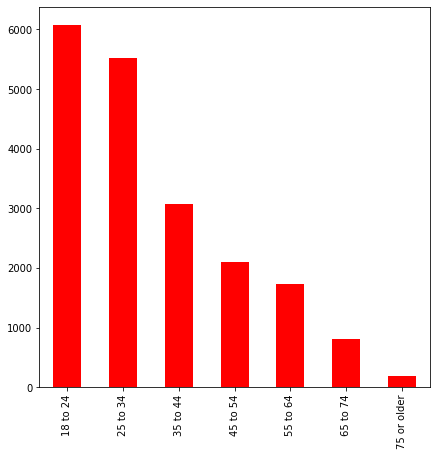

In [8]:
df['age'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'red', figsize = (7,7))

In [10]:
count = df['unique_id'].count()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 89 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   survey_type                                              24051 non-null  object 
 1   iso3166                                                  24046 non-null  object 
 2   city_town                                                24049 non-null  object 
 3   city_town_tr                                             20503 non-null  object 
 4   country_of_residence                                     24050 non-null  object 
 5   gender_not_listed                                        24051 non-null  int64  
 6   cisgender_man                                            24051 non-null  int64  
 7   cisgender_woman                                          24051 non-null  int64  
 8   non_conforming_or_non_bina

In [11]:
women =  df['woman'].sum()/count
men = df['cisgender_man'].sum()/count
black = df['black_or_of_african_descent'].sum()/count
hisp = df['hispanic_or_latinx'].sum()/count
ratio_list = [women, men, black, hisp]

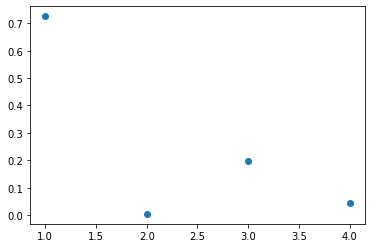

In [12]:
# Ratios of sex/race demographics
plt.scatter([1,2,3,4], ratio_list)

In [10]:
df = df.dropna(how = 'any')

In [18]:
df['age'].mode()

0    18 to 24
dtype: object

In [6]:
df['black_or_of_african_descent'].sum()

4760

In [23]:
analysis = df.iloc[:,7:33]

In [24]:
analysis.head()

,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,...,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white
0,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Canada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Switzerland,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Belgium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
analysis.groupby(['middle_eastern', 'man']).get_group((1,1))['country_of_residence'].mode()

0    Liberia
dtype: object

In [99]:
df.loc[:,'country_of_residence']

0        United Kingdom of Great Britain and Northern I...
1        United Kingdom of Great Britain and Northern I...
2                                                   Canada
3                                              Switzerland
4                                                  Belgium
                               ...                        
24046                                          Switzerland
24047                                   Russian Federation
24048                                          Switzerland
24049                                          Switzerland
24050                                          Switzerland
Name: country_of_residence, Length: 24051, dtype: object

In [110]:
# analysis of issues affecting people locally (city)
analysis = df.iloc[:,55:66]
analysis['country'] = df.loc[:,'country_of_residence']


In [114]:
analysis.head()

,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,country
0,0,0,0,1,0,0,1,0,1,0,0,United Kingdom of Great Britain and Northern I...
1,0,0,0,1,0,0,1,0,1,0,0,United Kingdom of Great Britain and Northern I...
2,0,0,0,0,0,0,0,0,0,0,0,Canada
3,0,0,1,0,0,0,1,0,0,1,0,Switzerland
4,1,0,0,0,0,0,1,0,0,1,0,Belgium


In [117]:
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')

In [148]:
analysis_long.groupby(['country', 'issue']).sum().reset_index().sort_values(by = 'value',ascending = False)

,country,issue,value
1469,Switzerland,issue_city_environmental_justice,879
1288,Russian Federation,issue_city_civil_rights_and_freedoms,861
1466,Switzerland,issue_city_economic_and_workers_rights,817
1470,Switzerland,issue_city_immigrant_and_refugee_rights,696
1292,Russian Federation,issue_city_ending_violence_harassment_and_abuse,674
...,...,...,...
1058,Morocco,issue_city_disability_rights,0
1059,Morocco,issue_city_economic_and_workers_rights,0
1060,Morocco,issue_city_education_and_youth_empowerment,0
1061,Morocco,issue_city_ending_violence_harassment_and_abuse,0


In [149]:
analysis_long.groupby(['country', 'issue']).sum().groupby('issue').get_group('issue_city_civil_rights_and_freedoms').sum()

value    2289
dtype: int64

In [141]:
df['issue_city_civil_rights_and_freedoms'].sum()

2289

In [154]:
analysis_long.groupby(['country', 'issue']).sum().groupby('country').get_group('Switzerland')

value
country     issue                                                    
Switzerland issue_city_LGBTQI+_rights                             227
            issue_city_civil_rights_and_freedoms                  490
            issue_city_disability_rights                          152
            issue_city_economic_and_workers_rights                817
            issue_city_education_and_youth_empowerment            385
            issue_city_ending_violence_harassment_and_abuse       561
            issue_city_environmental_justice                      879
            issue_city_immigrant_and_refugee_rights               696
            issue_city_indigenous_andor_roma_rights                22
            issue_city_racial_equity                              487
            issue_city_reproductive_freedom_and_bodily_auto...     28

<AxesSubplot:title={'center':'Analysis of issues (local/city level)'}, ylabel='issue'>

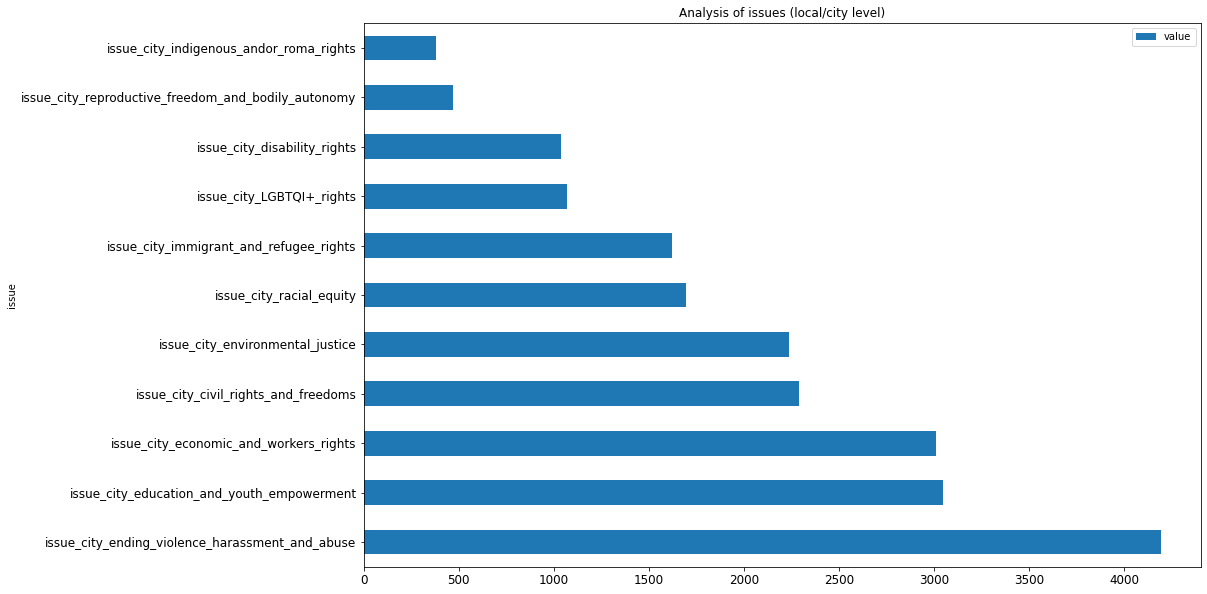

In [163]:
analysis_long.groupby(['issue']).sum().sort_values(by = 'value', ascending = False).plot.barh(title='Analysis of issues (local/city level)', figsize=(15,10), fontsize=12)

In [166]:
analysis = df.iloc[:,31:41]
analysis['country'] = df.loc[:,'country_of_residence']

In [167]:
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')

<AxesSubplot:title={'center':'Analysis of issues (local/city level)'}, ylabel='issue'>

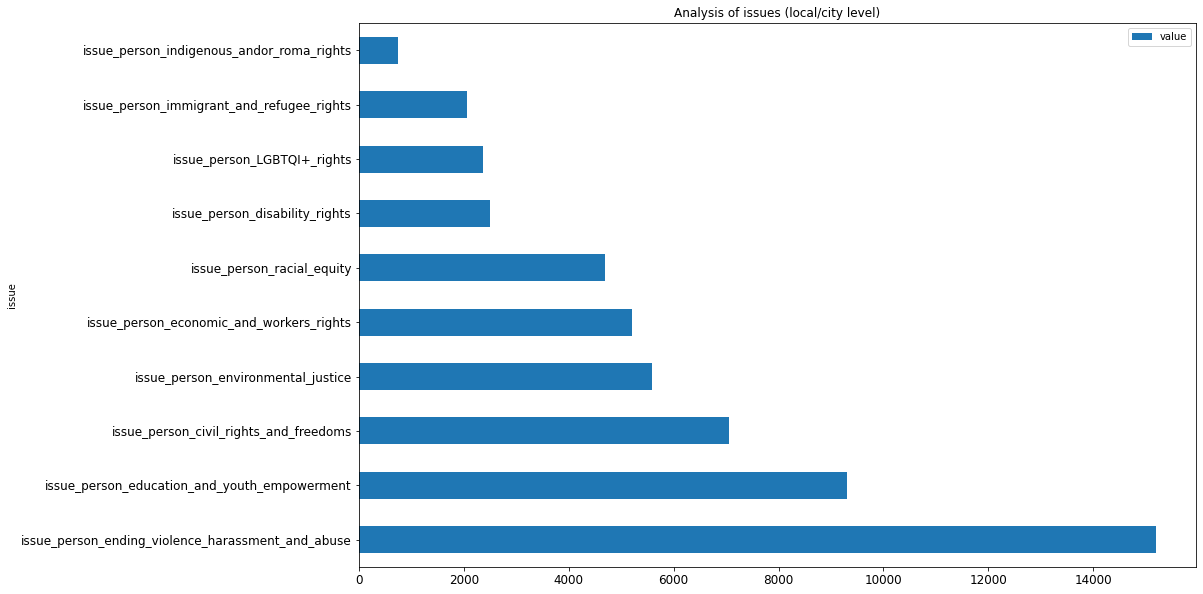

In [168]:
analysis_long.groupby(['issue']).sum().sort_values(by = 'value', ascending = False).plot.barh(title='Analysis of issues (global level)', figsize=(15,10), fontsize=12)